In [152]:
#importing necessary libraries

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler



%matplotlib inline

In [153]:
load_train = pd.read_csv(r"C:\Users\KEERTHI\Dropbox\My PC (DESKTOP-UDC1N84)\Downloads\Training.csv")
load_train.head(4)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [154]:
load_test=pd.read_csv(r"C:\Users\KEERTHI\Dropbox\My PC (DESKTOP-UDC1N84)\Downloads\Testing (1).csv")
load_test.head(4)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis


In [155]:
load_train = load_train.drop('Unnamed: 133',axis=1) #dropping "unnamed column"
load_train.head(4)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [156]:
load_train.shape #shape of the train dataset

(4920, 133)

In [157]:
load_test.shape #shape of the test dataset

(42, 133)

In [158]:
load_train.isnull().any() #check for missing values in each cell of the DataFrame

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

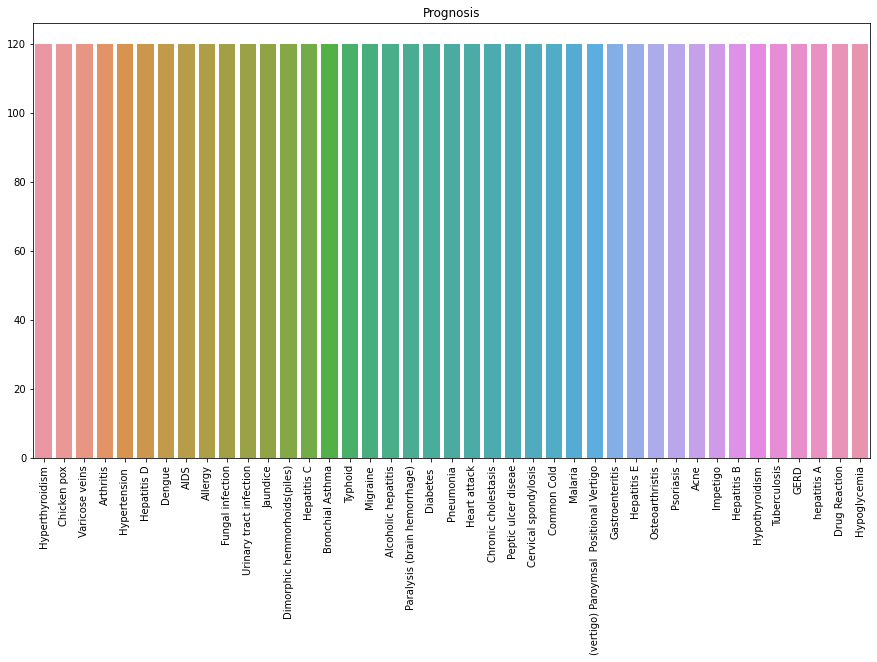

In [159]:
# Checking whether the dataset is balanced or not
total_disease = load_train["prognosis"].value_counts()
total_disease#counting the occurance of each disease in prognosis column

label = total_disease.index
value_count = total_disease.values


#plotting the data to visualize disease counts
plt.figure(figsize = (15,8))
sns.barplot(data = load_train, x = label, y = value_count)
plt.title('Prognosis')
plt.xticks(rotation=90)
plt.show() #displaying the plot

In [160]:
#importing labelencoder from sklearn.preprocessing
encoder = LabelEncoder()
load_train["prognosis"] = encoder.fit_transform(load_train["prognosis"]) #encode the disease names into numerical values
#Replace the original "prognosis" column with the encoded numerical values.

<AxesSubplot:>

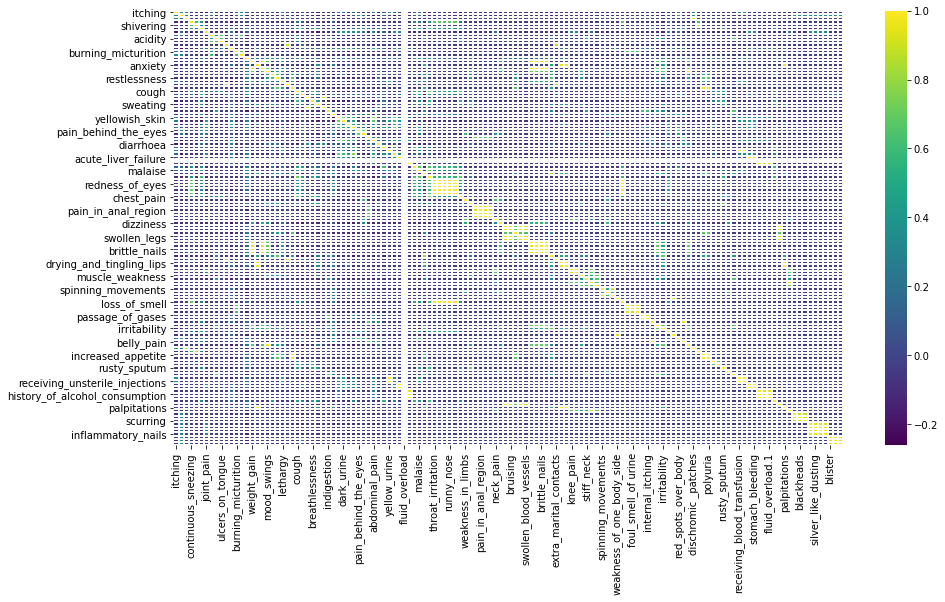

In [161]:
plt.figure(figsize=(15,8))
sns.heatmap(x.corr(),annot=False,linewidth=1 , cmap ='viridis')

# Random Forest:

* Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model.
* Unlike a single decision tree, which can overfit on the training data, Random Forest reduces overfitting by averaging the predictions of many trees trained on random subsets of the data.
* It introduces randomness both in the selection of data samples (bootstrap samples) and the features considered at each split, leading to diverse trees that collectively provide better generalization.
* Random Forest is known for its ability to handle high-dimensional data, large datasets, and maintain good performance without extensive hyperparameter tuning.

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

#Random Forest

RandomForest = RandomForestClassifier(random_state=24)
RandomForest.fit(x_train,y_train)
y_pred=RandomForest.predict(x_test)
print("Train Prediction:", accuracy_score(y_test,y_pred))
test_prediction = RandomForest.predict(X)
print("Test Prediction:", accuracy_score(Y,test_prediction))

Train Prediction: 1.0
Test Prediction: 0.9761904761904762


# Decision Tree:
* A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
* Decision trees are intuitive and easy to interpret, making them useful for understanding the logic behind classification decisions.
* However, they can be prone to overfitting, especially with complex datasets

In [163]:
#Decision Tree

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train,y_train)
DecisionTree_pred=DecisionTree.predict(x_test)
print("Train Prediction:", accuracy_score(y_test,DecisionTree_pred))
DecisionTree_pred_test= DecisionTree.predict(X)
print("Test Prediction:", accuracy_score(Y, DecisionTree_pred_test))

Train Prediction: 1.0
Test Prediction: 0.9761904761904762


# Support Vector Machine (SVM):
* SVM is a powerful supervised learning algorithm used for classification, regression, and outlier detection.
* SVM works by finding the optimal hyperplane that best separates the data points of different classes in a high-dimensional space.
* It is effective in high-dimensional spaces and is memory efficient since it only uses a subset of training points (support vectors) to define the decision boundary.
* SVM can handle non-linear decision boundaries using techniques like the kernel trick.

In [164]:
# Scale the features since SVM is sensitive to feature scaling

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_scaled = scaler.transform(X)
supportvecmach = SVC(kernel ='linear', random_state = 52,C= 100)
supportvecmech = supportvecmach.fit(x_train_scaled,y_train)
pred_y=supportvecmach.predict(x_test_scaled)
print("Train Prediction:", accuracy_score(y_test,pred_y))
pred_x_test = supportvecmach.predict(x_scaled)
print("Test Prediction:", accuracy_score(Y,pred_x_test))


Train Prediction: 1.0
Test Prediction: 0.9761904761904762



**In summary:**

* Decision trees are simple and interpretable but can overfit.
* SVM finds optimal hyperplanes in high-dimensional spaces and is effective for various types of data.
* Random Forest is a specific type of bagging classifier using decision trees, known for its robustness and ability to handle complex datasets.